### First version

    - 3 robots
    - all of them just find food
    - this behaviour is defined by LOVE towards Trees/Food
    - conditional if they are very close to food

In [1]:
from simulator_interface import open_session, close_session
import numpy as np

simulator, epuck1, epuck2, epuck3 = open_session(n_epucks=3)

N_TREES = 8
trees = [f"Tree#{i}" for i in range(N_TREES)]

id_map = {0: "",
          1: "#0",
          2: "#1"}

In [13]:
def looking_for_food(robot):
    # agg
    left, right = robot.prox_activations(tracked_objects=['Food'])
    left_wheel = right
    right_wheel = left
    return left_wheel, right_wheel, 1

def dodge_obstacles(robot):
    left, right = robot.prox_activations(tracked_objects=["20cmHighWall100cm",
                                                          "20cmHighPillar10cm",
                                                          "Tree", "ePuck"])
    obstacle_dists = np.array([left, right])
    # Sequence to avoid epucks getting stuck against an object
    if all(obstacle_dists > 0.93):
        robot.left_wheel = -1
        robot.right_wheel = -1
        robot.wait(1)
        robot.left_wheel = 0
        robot.wait(.2)
        robot.left_wheel = 1
        robot.right_wheel = 1
        robot.wait(2)
        robot.left_wheel = 0
        robot.right_wheel = 0

    left_wheel = left
    right_wheel = right
    return left_wheel, right_wheel, .5

def dodge_obstacles2(robot):
    left, right = robot.prox_activations(tracked_objects=["20cmHighWall100cm",
                                                          "20cmHighPillar10cm",
                                                          "Tree"])
    obstacle_dists = np.array([left, right])
    # Sequence to avoid epucks getting stuck against an object
    if all(obstacle_dists > 0.93):
        robot.left_wheel = -1
        robot.right_wheel = -1
        robot.wait(1)
        robot.left_wheel = 0
        robot.wait(.2)
        robot.left_wheel = 1
        robot.right_wheel = 1
        robot.wait(2)
        robot.left_wheel = 0
        robot.right_wheel = 0

    left_wheel = left
    right_wheel = right
    return left_wheel, right_wheel, .5

def follow_finder(robot):
    # agg
    left, right = robot.prox_activations(tracked_objects=["ePuck" + id_map[robot.finder_robot_id]])
    left_wheel = right
    right_wheel = left
    return left_wheel, right_wheel, 1

def smell_trees(robot):
    left, right = robot.prox_activations(tracked_objects= trees)
    
    left_wheel = 1 - right
    right_wheel = 1 - left   
    return left_wheel, right_wheel, 0.5

def log_position(robot):
    robot.add_log("position", robot.position())

def check_if_tree_is_food(robot):
    left, right = robot.prox_activations(tracked_objects=['Food'])
    dists = np.array([left, right])
    _, objs = robot.proximeters(mode="obj", tracked_objects=['Food'])
    
    if all(dists > 0.9) and any(['Food' in o for o in objs]):
        #simulator.remove_object(objs[0])
        print('Food Found')
        robot.found = True
        
        for e in simulator.robots:
            e.stop_all_behaviors()
            e.stop_all_routines()
            
            e.detach_all_behaviors()
            e.detach_all_routines()
            e.finder_robot_id = robot.id
        # Success dance
        robot.left_wheel = -1
        robot.right_wheel = -1
        robot.wait(.2)
        robot.left_wheel = 0
        robot.wait(1)
        robot.right_wheel = 0
            
        ## Phase 2 behaviour (after finding food)
        
        for e in simulator.robots:
            e.attach_behavior(dodge_obstacles2, freq=10)
            
            if not e.found:
                e.attach_behavior(follow_finder, freq=10)
                
            e.start_all_behaviors()
            
            e.attach_routine(log_position, freq=5)
            e.start_all_routines()

In [3]:

for i, e in enumerate(simulator.robots):
    e.found = False
    e.id = i

In [4]:
for e in simulator.robots:
    e.detach_all_behaviors()
    e.attach_behavior(looking_for_food, freq=10)
    e.attach_behavior(dodge_obstacles, freq=10)
    #e.attach_behavior(smell_trees, freq=10)
    #e.attach_behavior(fear, freq=10)
    e.start_all_behaviors()
    
    e.attach_routine(check_if_tree_is_food, freq=5)
    e.attach_routine(log_position, freq=5)
    e.start_all_routines()

Behavior looking_for_food started
Behavior dodge_obstacles started
Routine check_if_tree_is_food started
Routine log_position started
Behavior looking_for_food started
Behavior dodge_obstacles started
Routine check_if_tree_is_food started
Routine log_position started
Behavior looking_for_food started
Behavior dodge_obstacles started
Routine check_if_tree_is_food started
Routine log_position started


In [9]:
for e in simulator.robots:
    e.detach_all_behaviors()
    print(e.finder_robot_id)

1
1
1


In [ ]:
from time import sleep

In [ ]:
sleep(0.1)

In [7]:
for e in simulator.robots:
    print(e.found)

False
True
True


In [11]:
e.id

2

In [10]:
dir(e)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_prox_handles',
 '_attach',
 '_behaviors',
 '_body',
 '_camera',
 '_check',
 '_conditions',
 '_detach',
 '_detach_all',
 '_fwd_rot_2_lr',
 '_fwd_spd',
 '_has_eaten',
 '_left_joint',
 '_left_spd',
 '_light_sensor',
 '_lr_2_fwd_rot',
 '_prox_aliases',
 '_prox_handles',
 '_registered_objects',
 '_right_joint',
 '_right_spd',
 '_rot_spd',
 '_rot_speed',
 '_routines',
 '_sensations',
 '_start',
 '_start_all',
 '_stop',
 '_stop_all',
 '_wrapped_handle_notification',
 'add_log',
 'attach_behavior',
 'attach_routine',
 'attach_sensation',
 'base_lenght',
 'behavior_mixer',
 'camera_image',
 'camera_resolution',
 'catch_spher

In [ ]:
for e in simulator.robots:
    left, right = e.prox_activations(tracked_objects=['indoor'])
    dists = np.array([left, right])
    _, objs = e.proximeters(mode="obj", tracked_objects=['indoor'])
    print(dists)
    print(all(dists < 0.5))
    print(objs)
    print(any(['Food' in o for o in objs]))
    if all(dists < 0.5) and any(['Food' in o for o in objs]):
        print(e.found)
    print('-'*50)

In [ ]:
simulator.robots

In [ ]:
simulator.robots[-1] == epuck3

In [ ]:
robot.to_find

In [ ]:
?? robot.proximeters

In [ ]:
for e in simulator.robots:
    print(e)
    print(e.to_find)
    print(e.found)
    print('-'*20)

In [ ]:
_, objs = epuck1.proximeters(mode="obj")


In [ ]:
_

In [5]:
import matplotlib.pyplot as plt
import numpy as np

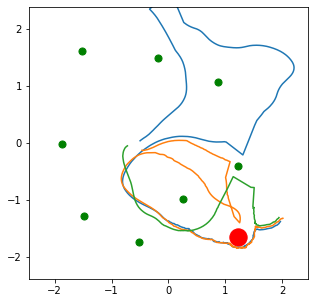

In [23]:
paths = [np.array(e.get_log('position')) for e in simulator.robots]

plt.figure(figsize=(5, 5))
plt.axis('equal')

plt.xlim(-2.45, 2.45)
plt.ylim(-2.45, 2.45)

trees = [f"Tree#{i}" for i in range(N_TREES)]
for t in trees:
    p = simulator.get_object_position(t)
    plt.scatter(p[0], p[1], s=50, c='green')
    
p = simulator.get_object_position('Food')
plt.scatter(p[0], p[1], s=300, c='red')

for path in paths:
    plt.plot(path[:, 0], path[:, 1])

In [9]:
e.prox_activations()

array([0.61216162, 0.58190145])

In [10]:
dir(e)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_prox_handles',
 '_attach',
 '_behaviors',
 '_body',
 '_camera',
 '_check',
 '_conditions',
 '_detach',
 '_detach_all',
 '_fwd_rot_2_lr',
 '_fwd_spd',
 '_has_eaten',
 '_left_joint',
 '_left_spd',
 '_light_sensor',
 '_lr_2_fwd_rot',
 '_prox_aliases',
 '_prox_handles',
 '_registered_objects',
 '_right_joint',
 '_right_spd',
 '_rot_spd',
 '_rot_speed',
 '_routines',
 '_sensations',
 '_start',
 '_start_all',
 '_stop',
 '_stop_all',
 '_wrapped_handle_notification',
 'add_log',
 'attach_behavior',
 'attach_routine',
 'attach_sensation',
 'base_lenght',
 'behavior_mixer',
 'camera_image',
 'camera_resolution',
 'catch_spher

In [11]:
?? e.move

In [12]:
dir(e)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_prox_handles',
 '_attach',
 '_behaviors',
 '_body',
 '_camera',
 '_check',
 '_conditions',
 '_detach',
 '_detach_all',
 '_fwd_rot_2_lr',
 '_fwd_spd',
 '_has_eaten',
 '_left_joint',
 '_left_spd',
 '_light_sensor',
 '_lr_2_fwd_rot',
 '_prox_aliases',
 '_prox_handles',
 '_registered_objects',
 '_right_joint',
 '_right_spd',
 '_rot_spd',
 '_rot_speed',
 '_routines',
 '_sensations',
 '_start',
 '_start_all',
 '_stop',
 '_stop_all',
 '_wrapped_handle_notification',
 'add_log',
 'attach_behavior',
 'attach_routine',
 'attach_sensation',
 'base_lenght',
 'behavior_mixer',
 'camera_image',
 'camera_resolution',
 'catch_spher

In [14]:
?? e.to_find

In [17]:
?? e.register_all_scene_objects

In [19]:
e.position()

[1.493253469467163, -1.1466771364212036, 0.019188083708286285]

In [22]:
e.move(0, rotate=np.pi)